# DSP Lab 2022-23


This lab assignment requires preparation before the lab session. Try to fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE" before the session in order to use the limited amount of available time to clarify any doubt or to discuss your solution. Paragraphs that start with ❓explain what you will need to do in the following cell.

Before you turn this notebook in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).


---

## Lab2 - Music Analysis and Synthesis

_Luis Caldas de Oliveira_

In the previous lab assignment, we discussed the analysis of stationary (sine and square waves) and quasi-stationary (a single musical note played by a musical instrument) signals. It introduced some tools that help characterize these signals in the time and frequency domains.

In this lab assignment, you will work with signals whose characteristics change in time as is a case of a musical piece. You will see that the analysis tools used previously can be applied if we divide a signal into small sections during which we assume that the signal is approximately stationary. The evolution of the characteristics of the signal obtained in this way allows us to extract information about its content such as the sequence of notes and the duration of each one.

The application of signal-processing approaches to extract meaningful information from music audio signals is called Music Information Retrieval (MIR), a field of study and research that focuses on the development of systems that can automatically analyze, process, and organize audio or music data.

In this assignment you will also go in the other direction, that is, to produce a music audio signal from a higher-level representation. A music synthesizer is a device that uses signal processing techniques to generate an audio signal. In the early years of electronic music, these devices were mostly composed of electronic circuits that generated and modified continuous-time signals, but today, most synthesizers use digital signal processing techniques for that purpose. Synthesizers can be used to create new sounds or to simulate natural sounds such as the ones produced by traditional musical instruments.

### Group and Student ID

#### A01 - Initialize group and student id

❓Initialize the variable `group_id` with the number that Fenix assigned to your group and `ist_id1` and `ist_id2` with your student numbers.

In [4]:
# YOUR CODE HERE
group_id = 16
ist_id1 = 91592
ist_id2 = 97381

print(f"Group number: {group_id}")
print(f"Student number: {ist_id1}")
print(f"Student number: {ist_id2}")

Group number: 16
Student number: 91592
Student number: 97381


In [5]:
assert isinstance(group_id, int) and isinstance(ist_id1, int) and isinstance(ist_id2, int)
assert (group_id > 0) and (group_id < 35)
assert (ist_id1 > 60000) and (ist_id1 < 120000) and (ist_id2 > 60000) and (ist_id2 < 120000)

### Group note

Remember your group note

In [6]:
semitones = ['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']
group_note = semitones[(ist_id1+ist_id2)%12] + str(3+(group_id-3)%4)
print(f"Your group's note is: {group_note}")

Your group's note is: A4


### Import libraries



In [7]:
import numpy as np
from IPython.display import Audio
import librosa
import librosa.display
from matplotlib import pyplot as plt

### Note frequency

In an equal temperament tuning system there is a relationship between a musical note and it's frequency if a reference pair is provided. The most common reference is to assign the frequency of $400\ Hz$ to the musical note A4.

#### A02 - Create a function to compute a note's frequency

❓The function `note_frequency()` computes the frequency of the note. Use only standard Python code.

In [8]:
def note_frequency(note):
    semitones = ['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']
    # YOUR CODE HERE
    note_num = semitones.index(note[0]) + (int(note[1]) + 1) * 12-69
    frequency = 440*2 ** ((note_num) / 12)
    return frequency


print(f"The frequency of B4 is {note_frequency('B4'):.2f} Hz")

The frequency of B4 is 493.88 Hz


In [9]:
assert np.isclose(note_frequency('A4'), 440)
assert np.isclose(note_frequency('A5'), 880)

### Major chord

A major chord is a chord made up of three notes that contains the 1st, 3rd, and 5th notes of a major scale. For example, the notes of a C major chord are the 1st (the root note), 3rd, and 5th notes, which are C (the root note), E, and G.

Given the major chord root note, the second note is the major third (root + 4 semitones) and the third note is the perfect fifth (root + 7 semitones).

#### A03 - Create a function to compute the frequencies of the 3rd and 5th notes

❓The function `major_cord()` computes the frequencies of the 3rd and 5th notes from the root frequency of the cord.

In [10]:
def major_chord(rootfreq):
    # YOUR CODE HERE
    thirdfreq = rootfreq * 2**(4/12) # Calculate the frequency of the major third
    fifthfreq = rootfreq * 2**(7/12)
    return thirdfreq, fifthfreq

print(f"The frequencies of the third and fifth of a C major chord are {major_chord(note_frequency('C4'))}")


The frequencies of the third and fifth of a C major chord are (329.6275569128699, 391.99543598174927)


In [11]:
print(note_frequency('E4'),major_chord(note_frequency('C4'))[0])

assert np.isclose(major_chord(note_frequency('C4'))[0], note_frequency('E4'))
assert np.isclose(major_chord(note_frequency('C4'))[1], note_frequency('G4'))

329.6275569128699 329.6275569128699


### Generate and play the group's chord

In [12]:
fs = 22050
thirdfreq, fithfreq = major_chord(note_frequency(group_note))
rootw= 2*np.pi*note_frequency(group_note)/fs
thirdw= 2*np.pi*thirdfreq/fs
fifthw= 2*np.pi*fithfreq/fs

# play the notes of the chord
n = np.arange(0, 2*fs)
group_chord = np.sin(rootw*n)
group_chord[int(fs/2):] += np.sin(thirdw*n[int(fs/2):])
group_chord[fs:] += np.sin(fifthw*n[fs:])
Audio(group_chord, rate=fs)

### Frame-based RMS

Frame-based root mean square (RMS) is a method of calculating the root mean square (RMS) of an audio signal by analyzing it in a series of frames. Each frame is a sequence of $N$ consecutive samples of the signal. $N$ is commonly referred as the _frame size_.

It works by taking each frame of the signal and calculating the RMS value for that specific frame.

It works by taking each frame of the signal and calculating the RMS value for that specific frame. 

It is common to have some overlap between frames. This means that the next frame begins $K$ samples after the beginning of the previous frame. $K$ is referred as the _hop size_ and is often defined as a fraction of the _frame size_ ($K = N/4$, for example).

The frame-based RMS can be useful in determining the time changes in the loudness or power of an audio signal, as well as providing a way to compare different signals to one another. This measure is widely used in audio engineering and music production, where it is important to get an accurate measurement of the loudness of a particular recording.

#### A04 - Create a function to compute the frame-base RMS

❓Use only standard Python or NumPy library functions to create a function that returns a NumPy array with the frame-based RMS values.

In [89]:

def rms(x, frame_size=0, hop_size=0):
    """Compute the RMS of a signal in frames.
    
    Parameters
    ----------
    x : np.ndarray
        Input signal.
    frame_size : int
        Frame size in samples. If 0, the whole signal is used.
    hop_size : int
        Hop size in samples. If 0, the frame size is divided by 4.
    
    Returns
    -------
    rms : np.ndarray
        RMS of the signal in frames.
    """
    if frame_size == 0:
        frame_size = len(x)
        hop_size = frame_size
    if hop_size == 0:
        hop_size = frame_size/4
    fbrms=[]
    for i in range(int(x.size/frame_size)):
        xi = x[hop_size+(i-1)*frame_size:hop_size+(i)*frame_size] if i!=0 else x[:frame_size]
        fbrms.append(np.sqrt((1/xi.size)*np.sum(xi**2)))

    #fbrms=np.array([np.sqrt((1/i.size)*np.sum(i**2))for i in np.array(np.split(x,hop_size,axis=0)).T])

    return fbrms


In [90]:
assert np.isclose(np.sum(rms(np.ones(1000), 100, 100)), 10.)

### Frame-based RMS of the group's chord

A small frame size is good for locating rapid transitions in energy levels, but introduces fluctuations in stable regions.

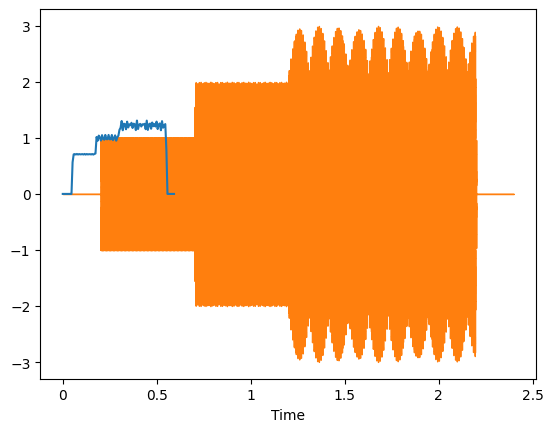

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [91]:
frame_size = 512
hop_size = 128
# add some silence at the beginning and end of the chord
chord = np.concatenate([np.zeros(int(0.2*fs)), group_chord, np.zeros(int(0.2*fs))])
rms_chord = rms(chord, frame_size=frame_size, hop_size=hop_size)
t = np.arange(len(rms_chord)) * hop_size / fs
plt.plot(t, rms_chord)
librosa.display.waveshow(chord, sr=fs)

### Frame-based RMS of an audio signal

A larger frame size produces a smoother energy envelope but fails to locate fast energy transitions.

In [92]:
frame_size = 2048
hop_size = 512
x, fs = librosa.load(librosa.ex('trumpet'))
rms1 = rms(x, frame_size=frame_size, hop_size=hop_size)
t = np.arange(len(rms1)) * hop_size / fs
plt.plot(t, rms1)
librosa.display.waveshow(x, sr=fs)

### Decibels relative to full scale (dBFS)

Decibels relative to full scale (dBFS) is a measure of amplitude levels in decibels.

If $v$ is the amplitude of the signal that we want to measure and $v_{0}$ a reference amplitude, the amplitude ratio in decibels is:
$$
L_{dB} = 20 \log_{10}\left( \frac{v}{v_{0}}\right)
$$

The measure of decibels realtive to full scale (dBFS) assumes that $v_0$ is the maximum possible value for $v$ such that:
$$
L_{dBFS}(v_{0}) = 0\ dB
$$

When the amplitude is at 50% of the maximum level:
$$
L_{dBFS}\left( \frac{v_{0}}{2} \right) \approx -6\ dB
$$

Many signals resulting from an analog to digital conversion are represented in an amplitude range of $[-1,1]$, which means that $v_{0}=1$.

#### A05 - Create a function to compute the dBFS

❓Use only standard Python or NumPy library functions to create a function to convert to dBFS a NumPy array with linear amplitudes.

In [ ]:
def dbfs(amplitude):
    """
    Convert amplitude to decibels relative to full scale.
    """
    # YOUR CODE HERE
    raise NotImplementedError()
    return db

In [ ]:
assert np.isclose(dbfs(1), 0)
assert np.isclose(dbfs(0.5), -6, atol=0.1)

### short-time Fourier transform (STFT)

The short-time Fourier transform is a type of Fourier analysis used to determine the frequency content of a signal over short, fixed-length time intervals. It is used in many applications, such as speech processing and musical analysis. The STFT is based on the conventional Fourier transform, but it divides the signal into overlapping segments and then performs a Fourier analysis for each segment. This results in a two-dimensional representation of the signal, where the frequency is on one axis and time on the other. Different resolutions can be obtained for analyzing different aspects of the signal by varying the size and position of the segments.

The signal segmentation is performed by multiplying the signal by a window function $w(n)$ that is zero-valued outside a specified interval. For example the rectangular window:
$$
w_{r}(n) =
\begin{cases}
1, & 0 \le n \le M-1 \\
0, & \text{otherwise}
\end{cases}
$$

The short-time Fourier transform, $X(n, \omega)$ is a two-dimensional representation of the signal $x(n)$:
$$
X(n, \omega) = \sum_{m=-\infty}^{+\infty} x(n+m)w(m) e^{-j\omega (n+m)} 
$$

If we use the discrete Fourier transform (DFT):

$$
X(n,k) = \sum_{m=0}^{M-1}x(n+m)w(m) e^{-j \frac{2\pi}{M}(n+m)},\ 0\le k \le M-1
$$


### Spectrogram of a signal

The spectrogram of a time-domain signal is a representation of the magnitude of the [[short-time Fourier transform (STFT)]] ($X(n,k)$) of a signal.

To facilitate the analysis of the signal, it is common to use the time axis in seconds or milliseconds and the frequency axis in Hz. The value of the amplitude of the spectrum at each point is represented with a darker color for low values and brighter color for higher values.

For better visualization of the entire range of amplitudes, it is frequent to represent them in decibels (dB).

The short-time Fourier transform can be computed with the `librosa.stft()` function. The resulting linear amplitudes need to be converted to dB. The function `librosa.display.specshow()` function can then be used to display the spectrogram as a frequency versus time representation of the signal.

In [ ]:
def spectrogram(x, fs, n_fft=2048, win_length=2048, hop_length=512, window='hann'):
    D = librosa.stft(x, n_fft=n_fft, win_length=win_length, hop_length=hop_length, window=window)
    DAbsdB = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    return DAbsdB

# Test spectrogram: plot a spectrogram of a trumpet audio

x, fs = librosa.load(librosa.ex('trumpet'), duration=3)

DAbsdB = spectrogram(x, fs)
fig, ax = plt.subplots(figsize=(10,8))
img = librosa.display.specshow(DAbsdB, ax=ax, x_axis='time', y_axis='linear')
ax.set(title='Linear-frequency power spectrogram')
ax.label_outer()
fig.colorbar(img, ax=ax, format="%+2.f dB")

Audio(data=x, rate=fs)

### Wave and spectrogram visualization

It is frequently useful to have a simultaneous view of both the spectrogram and the time domain waveform aligned in time.

In [ ]:
def spec_wave_show(x, fs, tmin=0, tmax=0, n_fft=2048, win_length=2048, hop_length=512, window='hann'):
    """
    Plot a spectrogram and a waveform of a signal x
    """
    if (tmax == 0):
        tmax = x.shape[0]/fs
    nseg = np.arange(np.floor(tmin*fs), np.ceil(tmax*fs), dtype=int)

    D = librosa.stft(x, n_fft=n_fft, win_length=win_length, hop_length=hop_length, window=window)
    DAbsdB = librosa.amplitude_to_db(np.abs(D), ref=np.max)

    fig, ax = plt.subplots(figsize=(10,8), nrows=2, height_ratios=[4, 1], sharex=True)
    ax[0].set(xlim=[tmin, tmax])
    librosa.display.specshow(DAbsdB, sr=fs, n_fft=n_fft, win_length=win_length, hop_length=hop_length, ax=ax[0], x_axis='time', y_axis='linear')
    ax[0].set(title='Linear-frequency power spectrogram')
    librosa.display.waveshow(x, sr=fs, x_axis='time')
    display(Audio(data=x[nseg], rate=fs))
    plt.tight_layout()
    plt.show()
    return fig, ax

img, ax = spec_wave_show(x, fs, tmin=0.0, tmax=1.9)

### Time versus frequency resolution

As with the computation of the frame-based RMS, the size of the frame needs to be adjusted depending on the desired time or frequency resolution.

The previous spectrogram was computed with the default frame size of 2048 samples. To increase the time resolution we can reduce it to 256 samples.

In [ ]:
fsize = 256
img, ax = spec_wave_show(x, fs, tmin=0.0, tmax=1.9, n_fft=fsize, win_length=fsize, hop_length=fsize//4, window='hann')

#### A06 - Wideband and narrowband spectrograms

❓Compare the differences between the spectrograms with frame sizes of 2048 and 256 samples. Wich one can be considered a narrowband spectrogram? Give an example of an applications for a wideband spectrogram and for a narrowband spectrogram.

YOUR ANSWER HERE

### Autocorrelation

Autocorrelation measures how closely related a sequence of values is to itself over successive time intervals. It describes the degree of similarity between observations as a function of the time lag between them. 

It can be defined as:
$$
r_{x} (m) = \sum_{n=-\infty}^{+\infty} x(n) x(n+m)
$$
where the variable $m$ is called _lag_. 

The autocorrelation sequence is symmetric: $r_{x}(m) = r_{x}(-m)$.

The autocorrelation can be used to find the periodicity of a noisy signal since it should be periodicly more similar to itself. This, for example, the case of a tone produced by a musical instrument.

The following code computes the autocorrelation of a segment with 256 samples of a stationary region of the second note of the recording  (D5, 587.330 Hz).


In [ ]:

N = 512
tmiddle = 0.294
tmin = tmiddle - N/(2*fs)
tmax = tmin + N/fs
n_seg = np.arange(tmin*fs, tmax*fs, dtype=int)
note2 = x[n_seg]


acorr = librosa.autocorrelate(note2)

time = np.linspace(0,1000*N/fs,N)
plt.plot(time, acorr)
plt.xlabel("Time (ms)")
plt.grid()
plt.show()

# skip the first 3 samples to locate the index of the second maximum
lag = np.argmax(acorr[3:])+3
print(f"D5 frequency: 587.330 Hz")
print(f"lag = {lag}")
print(f"period = {1000*lag/fs:.2f} ms")
print(f"frequency = {fs/lag:.2f} Hz")

### Peak-picking

A peak-picking algorithm is an algorithm used to detect local maxima and minima in a set of data. The algorithm typically begins by smoothing the data with a moving average or similar technique. Once the data has been smoothed, the algorithm searches for local maxima and minima, which can be identified by comparing values between adjacent points in the data set. 

The libROSA library includes the function `librosa.util.peak_pick()` that returns the indexes of the most prominent peaks in the signal.

Finding all the peaks of the autocorrelation function provides a better estimate of the fundamental frequency of the signal.

In [ ]:

peaks = librosa.util.peak_pick(acorr, pre_max=3, post_max=3, pre_avg=3, post_avg=5, delta=0.8, wait=10)

# plot the autocorrelation and location of the peaks
time = np.linspace(0,1000*N/fs,N)
plt.plot(time, acorr)
plt.plot(time[peaks], acorr[peaks], "x")
plt.xlabel("Time (ms)")
plt.grid()
plt.show()


#### A07 - Define a function to compute the pitch of a signal

❓Define the contents of the function `pitch()` that provides a better estimate of the fundamental frequência in Hz of the signal `x` by using more harmonic peaks.

In [ ]:
def pitch(x, fs):
    """
    Compute the pitch of a signal x
    """
    # YOUR CODE HERE
    raise NotImplementedError()
    return f0

print(f"D5 frequency: 587.330 Hz")
print(f"Frequency using 1st peak: {fs/lag:.2f} Hz")
print(f"Frequency using pitch() function: {pitch(note2, fs):.2f} Hz")

In [ ]:
assert np.isclose(pitch(note2, fs), 587.330, atol=3)

### Spectral flux

Spectral flux is a measure of the change in the magnitude spectrum of a signal over time. Spectral flux measures the difference in energy between two consecutive audio frames and can be used for onset detection or to detect percussive elements or rhythmic transitions. It is also used for sound classification, beat tracking, and instrument detection.

The spectral flux can be computed using the temporal evolution of the magnitude spectrogram $| X(n,k) |$ by computing the difference between two consecutive short-time spectra and then summing all positive deviations:

$$
SF(n) = \sum_{k=1}^{N/2} H \left( |X(n,k)| - |X(n-1,k)| \right)
$$

where $n$ is the frame number, $k$ the frequency bin index, and $H(\cdot)$ is the half-wave rectifier function:
$$
H(x) = \frac{x+|x|}{2}
$$



### Onset strength

Onset strength is a measure of the energy within an audio signal at the beginning of a sound. It can be used to identify when a sound begins, as well as how loud or soft that sound may be. Onset strength is typically measured in decibels (dB) or in amplitude (or root mean square). It is a useful tool for analyzing and manipulating audio, such as for creating reverberation effects, adjusting dynamic range, or altering the timing of sounds.

The function `librosa.onset.onset_strength()` computes a spectral flux onset strength envelope.

A peak-picking function can then be used to find the onsets of each note. The 
`librosa.onset.onset_detect()` function locates note onset events by picking peaks in the onset strength envelope. The _peak_pick_ parameters were chosen by large-scale hyper-parameter optimization over a dataset.

In [ ]:


# Compute the onset strength envelope
onset_env = librosa.onset.onset_strength(y=x, sr=fs)

# Use peak picking to obtain actual onsets
onset_frames = librosa.onset.onset_detect(onset_envelope=onset_env, sr=fs)

# Compute and plot the spectrogram
D = np.abs(librosa.stft(x))
times = librosa.times_like(D)

fig, ax = plt.subplots(nrows=3, height_ratios=[3, 1, 1], sharex=True, figsize=(12, 6))
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), x_axis='time', ax=ax[0])
ax[0].set(title='Power spectrogram')
ax[0].label_outer()

# Plot the onset envelope
ax[1].plot(times, onset_env, alpha=0.8, label='Mean (mel)')

# Plot the onsets as vertical lines
ax[1].vlines(times[onset_frames], 0, onset_env.max(), color='r', alpha=0.9, linestyle='--', label='Onsets')

librosa.display.waveshow(x, sr=fs, ax=ax[2])
ax[2].vlines(times[onset_frames], -1, 1, color='r', alpha=0.9, linestyle='--', label='Onsets')

plt.tight_layout()
plt.show()

### Human annotation

A human annotator found the following onset locations.

In [ ]:
humam_onsets = [0, 0.197047, 0.373982, 0.553917, 0.702099,
                0.877512, 1.051384, 1.114890, 1.294825, 1.384577,
                1.439750, 1.518568, 1.647638, 1.878505, 2.009869,
                2.149115, 2.335652, 2.540256
            ]

fig, ax = plt.subplots(nrows=2, height_ratios=[3, 1], sharex=True, figsize=(12, 6))
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), x_axis='time', ax=ax[0])
ax[0].vlines(humam_onsets, 0, 1000, color='w', alpha=0.9, linestyle='--', label='Onsets')

librosa.display.waveshow(x, sr=fs, ax=ax[1])
ax[1].vlines(humam_onsets, -1, 1, color='r', alpha=0.9, linestyle='--', label='Onsets')


#### A08 - Onset detection assessment

❓Identify the differences between the results of the automatic onset detector and the human reference. What types of errors exist? What metrics should be used to assess the performance of the onset detector?

YOUR ANSWER HERE

### Wavetable synthesis

Wavetable synthesis is a method for generating a periodic signal by repeated reproduction of a table with the samples of one cycle of the desired waveform.

For example, the wavetable $t(n)$ may contain $L$ samples of a single period of the sine function:
$$
t(n) = \sin\left(\frac{2\pi}{L}n\right), 0\le n \le L-1
$$

A periodic signal $s(n)$ can be synthesized by:
$$
s(n) = t(n\ \mathbf{mod}\ L)
$$

where $\mathbf{mod}$ is the modulus operator. This is the same as shifting and concatenating the wavetable:
$$
s(n) = \sum_{l=-\infty}^{+\infty} t(n-lL)
$$

With a sampling frequency of $f_s$, this will produce a continuous time signal $s_c(t)$ with frequency $f_s/L$ Hz.

To synhthesize a signal with frequency $f$, the wavetable can be re-sampled with the factor $a=L f/f_s$ to produce a periodic signal with the desired frequency:
$$
s(n) = t(\lfloor{an}\rceil\ \mathbf{mod}\ L)
$$

where $\lfloor \cdot \rceil$ is the round to the nearest integer operator.


When $a$ is not an integer, the resulting periodic signal will no be the uniform sampling of a sinusoid. A better approximation can be achieve by interpolation. For example, using linear interpolation:
$$
s(n) = t(\lfloor{an}\rfloor\ \mathbf{mod}\ L) +(an-\lfloor{an}\rfloor)\left[ t(\lceil{an}\rceil\ \mathbf{mod}\ L) - t(\lfloor{an}\rfloor\ \mathbf{mod}\ L)\right]
$$

This can also be computed using a temporary buffer with a signal with a period of L:
$$
b(n) = \sum_{l=-\infty}^{+\infty} t(n-lL)
$$

That is then re-sampled to adjust its period to the desired value $N_{0}=aL$:
$$
s(n) = b(\lfloor an \rceil)
$$

Using linear interpolation:
$$
s(n) = b(\lfloor{an}\rfloor) +(an-\lfloor{an}\rfloor)\left[ b(\lceil{an}\rceil) - b(\lfloor{an}\rfloor)\right]
$$

In [ ]:
def wavetable_generate(dur, funct):
    """
    Generate a wavetable of len samples using the specified
    function that is assumed to have a period of 2pi
    """
    return funct(2*np.pi*np.arange(dur)/dur)


def wavetable_synthesis(wavetable, freq, sr, dur):
    """
    Synthesize a periodic signal using a given wavetable.
    The wavetable is assumed to have a period of 2pi.
    """
    # N is the number of samples of the synthesized signal
    N = int(dur*sr)
    # L is the length of the wavetable
    L = wavetable.size
    # N0 is the desired period in samples of the synthesized signal
    N0 = int(sr/freq+0.5)
    # buffer signal of period L with the right number of periods
    buffer = np.tile(wavetable,int(np.ceil(N/N0)))
    # resample buffer to match the desired period with linear interpolation
    # using resampling coefficient a=L/N0
    s = np.interp(np.arange(0, buffer.size, L/N0), np.arange(buffer.size), buffer)
    return s[:N]


#### A09 - Generate a 440 Hz sine wave

❓Use functions `wavetable_generate()` and `wavetable_synthesis()` to produce a one second 440 Hz pure tone using a wavetable of 64 samples.

In [ ]:
fs = 22050
# YOUR CODE HERE
raise NotImplementedError()
plt.plot(wtable, ".")
Audio(swav, rate=fs)

In [ ]:
assert np.isclose(len(swav), fs)
assert np.isclose(len(wtable), 64)

### ADSR envelope

The envelope of a waveform is one of the sound characteristics that influence the timbre of a sound.  It determines the shape of a waveform and how it changes over time. The envelope is often described in terms of the attack, decay, sustain and release (ADSR) characteristics of a sound. 


![ADSR model](https://upload.wikimedia.org/wikipedia/commons/thumb/5/58/ADSR_envelope.png/320px-ADSR_envelope.png)

The attack is the initial rise in amplitude of a sound or note, the decay is the duration of the gradual decrease in amplitude that follows the attack until it reaches the sustain amplitude, and the release is how fast it fades out after the key is released. Together, these parameters determine how a sound will evolve over time and affect its overall timbre.

In [ ]:
def adsr_envelope(x, attack=0.1, decay=0.2, sustain=0.8, release=0.4, height=1.0):
    """
    Shape a signal with an ADSR envelope.
    attack: ratio of the attack phase
    decay: ratio of the decay phase
    sustain: amplitude ratio of the sustain phase
    release: ratio of the release phase
    height: amplitude ratio of the whole signal
    """
    shapeA = np.linspace(0, 1, int(attack * len(x)))
    shapeD = np.linspace(1, sustain, int(decay * len(x)))
    shapeR = np.linspace(sustain, 0, int(release * len(x)))
    shapeS = np.ones(len(x)-len(shapeA)-len(shapeD)-len(shapeR)) * sustain
    shape = np.concatenate((shapeA, shapeD, shapeS, shapeR))
    return x * shape * height


fs = 22050
duration = 0.2
t = np.linspace(0, duration, int(duration*fs))
sinew = np.sin(2 * np.pi * 440 * t)
shaped_sine = adsr_envelope(sinew)

plt.plot(t, shaped_sine)
Audio(shaped_sine, rate=fs)

### Musical score and symbolic representations

A musical score also referred to as sheet music, is a visual representation of a musical composition. It is written on a staff consisting of five lines and four spaces. This notation is used to indicate the pitch, duration, meter, and rhythm of the music. It also includes symbols such as clefs, key signatures, time signatures, accidentals, and other marks which help in understanding the music. The score includes instructions for how to perform the piece in terms of dynamics, phrasing, and articulation. The musical score is designed to be read by a musician, such as a composer, a conductor, or an instrumentalist.

The development of the electronic music industry raised the need for other forms of musical symbolic representation. At the beginning of the 1980s, the Musical Instrument Digital Interface (MIDI) protocol was developed as an industry standard to allow digital electronic musical instruments to work together. MIDI allowed musicians to record, store, and manipulate musical performances and compositions, as well as control multiple instruments and sounds with one device. This opened up a whole new range of possibilities in terms of creating music electronically.

We will use a simple format for symbolic representation where each note event is a python list with `(note, amplitude, duration)` and musical composition is a list of note events. The trumpet sequence can thus be represented as a list of lists.

In [ ]:
trumpet_note_events = (
    ('D#5', 0.4, 0.194047),
    ('D5' , 0.5, 0.373982-0.194047),
    ('C5' , 0.3, 0.553917-0.373982),
    ('A#4', 0.7, 0.702099-0.553917),
    ('G#4', 0.2, 0.877512-0.702099),
    ('A#4', 0.6, 1.051384-0.877512),
    ('B4' , 0.6, 1.114890-1.051384),
    ('C5' , 0.4, 1.294825-1.114890),
    ('C5', 0.05, 1.384577-1.294825),
    ('B4' , 0.5, 1.439750-1.384577),
    ('A#4', 0.4, 1.518568-1.439750),
    ('G#4', 0.3, 1.647638-1.518568),
    ('F4', 0.4, 1.878505-1.647638),
    ('F4', 0.05, 2.009869-1.878505),
    ('A#4', 0.6, 2.149115-2.009869),
    ('A#4', 0.1, 2.335652-2.149115),
    ('G#4', 0.5, 2.540256-2.335652),
    ('F4', 0.4, 3.000000-2.540256))

### Synthesis of a musical composition

A music synthesizer can convert a symbolic representation of a musical composition into a sound signal. 

#### A10 - Define a function for music synthesis

❓Use the functions `wavetable_generate()`, `adsr_envelope()`, `note_frequency()`, and `wavetable_synthesis()` to convert the composition in the list `trumpet_note_events`into a sound signal.

In [ ]:
def synthesize_composition(composition, fs):
    """
    Synthesize a sound signal based on a symbolic representation of a
    musical composition
    """
    out = np.array([])
    # YOUR CODE HERE
    raise NotImplementedError()
    return out

fs = 22050
s_out = synthesize_composition(trumpet_note_events, fs)

# Plot the output signal
fig, ax = plt.subplots(figsize=(12, 4))
librosa.display.waveshow(s_out, sr=fs, ax=ax)
ax.vlines(humam_onsets, -1, 1, color='r', alpha=0.9, linestyle='--', label='Onsets')

# Play the output signal
Audio(s_out, rate=fs)

In [ ]:
assert np.isclose(len(s_out), 3*fs, atol=200)
assert np.isclose(np.max(s_out), 0.7, atol=0.05)